In [7]:
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from collections import defaultdict

,content,annotation,extras,Skills,College Name,Graduation Year,Designation,Companies worked at,Email Address,Location,Name,Degree,Years of Experience,UNKNOWN,length
178,"Angad Waghmare\nPune, Maharashtra - Email me o...","[{'label': ['Degree'], 'points': [{'start': 38...",None,"[{'start': 3110, 'end': 3845, 'text': 'active ...",NaN,NaN,NaN,NaN,"[{'start': 2529, 'end': 2572, 'text': 'indeed....","[{'start': 570, 'end': 573, 'text': 'Pune'}, {...","[{'start': 0, 'end': 13, 'text': 'Angad Waghma...","[{'start': 3878, 'end': 3936, 'text': 'Microso...",NaN,NaN,3958
212,Gaikwad Dilip\nMicrosoft Dainamic Software Bil...,"[{'label': ['Skills'], 'points': [{'start': 95...",None,"[{'start': 951, 'end': 989, 'text': 'TALLY MIC...",NaN,NaN,"[{'start': 608, 'end': 651, 'text': 'Microsoft...","[{'start': 926, 'end': 940, 'text': 'PUNE UNIV...",NaN,"[{'start': 92, 'end': 95, 'text': 'Pune'}]","[{'start': 0, 'end': 12, 'text': 'Gaikwad Dili...","[{'start': 919, 'end': 924, 'text': 'B.COM '}]",NaN,NaN,1087
99,"Vikas Singh\nChandigarh, Chandigarh - Email me...","[{'label': ['Skills'], 'points': [{'start': 53...",None,"[{'start': 5347, 'end': 5749, 'text': 'SECURIT...","[{'start': 5240, 'end': 5281, 'text': 'GLA Ins...","[{'start': 5333, 'end': 5336, 'text': '2013'},...","[{'start': 1030, 'end': 1049, 'text': ' Techno...","[{'start': 3426, 'end': 3441, 'text': 'Infosys...","[{'start': 57, 'end': 98, 'text': 'indeed.com/...","[{'start': 3371, 'end': 3380, 'text': 'Chandig...","[{'start': 0, 'end': 10, 'text': 'Vikas Singh'}]","[{'start': 5171, 'end': 5237, 'text': 'Bachelo...",NaN,NaN,5750


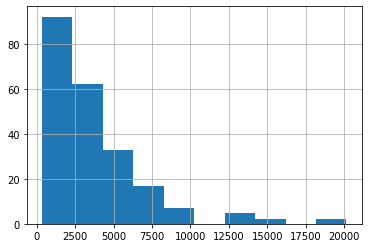

In [10]:
dataset_relative_path = "../dataset.json"

def pop_annot(raw_line):
    in_line = defaultdict(list, **raw_line)
    if "annotation" in in_line:
        labels = in_line["annotation"]
        for c_lab in labels:
            if len(c_lab["label"]) > 0:
                in_line[c_lab["label"][0]] += c_lab["points"]
    return in_line


with open(dataset_relative_path, "r") as f:
    # data is jsonl and so we parse it line-by-line
    resume_data = [json.loads(f_line) for f_line in f.readlines()]
    resume_df = pd.DataFrame([pop_annot(line) for line in resume_data])

resume_df["length"] = resume_df["content"].map(len)
resume_df["length"].hist()
resume_df.sample(3)
